<a href="https://colab.research.google.com/github/amirrhseiin/Airbnb_Statistical_Analysis/blob/main/Air_bnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import urllib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/AB_NYC_2019.csv.zip")

In [ ]:
dataset = dataset.drop(['id','name','host_id','host_name', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis=1)

In [ ]:
dataset

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


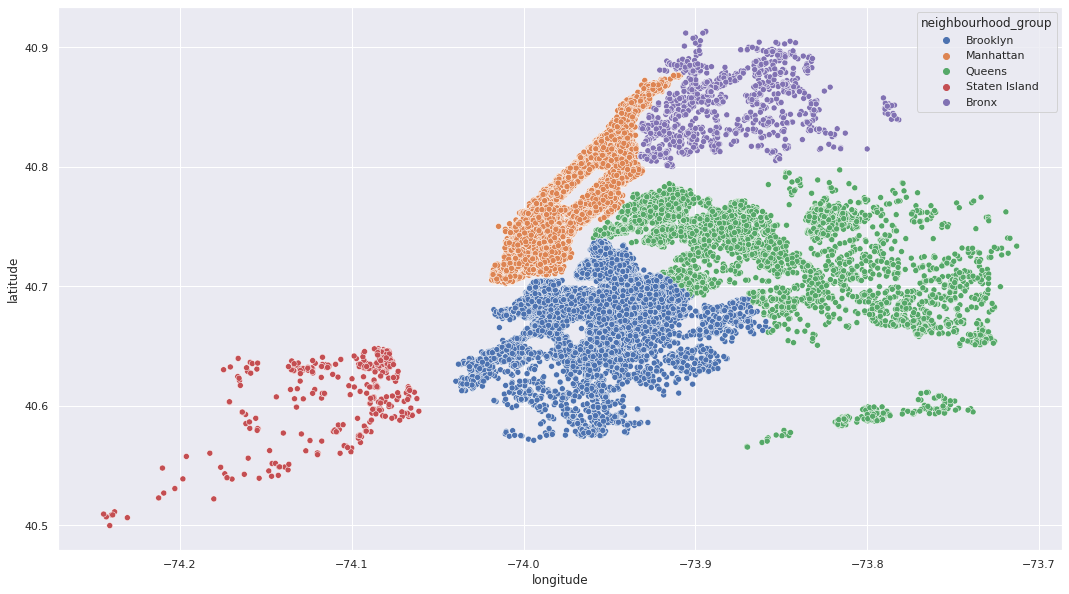

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(dataset.longitude, dataset.latitude, hue=dataset.neighbourhood_group)

In [ ]:
sample_1 = dataset.sample(n=15000)

In [ ]:
sample_1 = sample_1[sample_1['price']>0]

In [ ]:
sample_1 = sample_1[sample_1['price']<500]

(array([2542., 4962., 3055., 1864.,  916.,  574.,  294.,  217.,  102.,
          56.]),
 array([ 10. ,  58.9, 107.8, 156.7, 205.6, 254.5, 303.4, 352.3, 401.2,
        450.1, 499. ]),
 <a list of 10 Patch objects>)

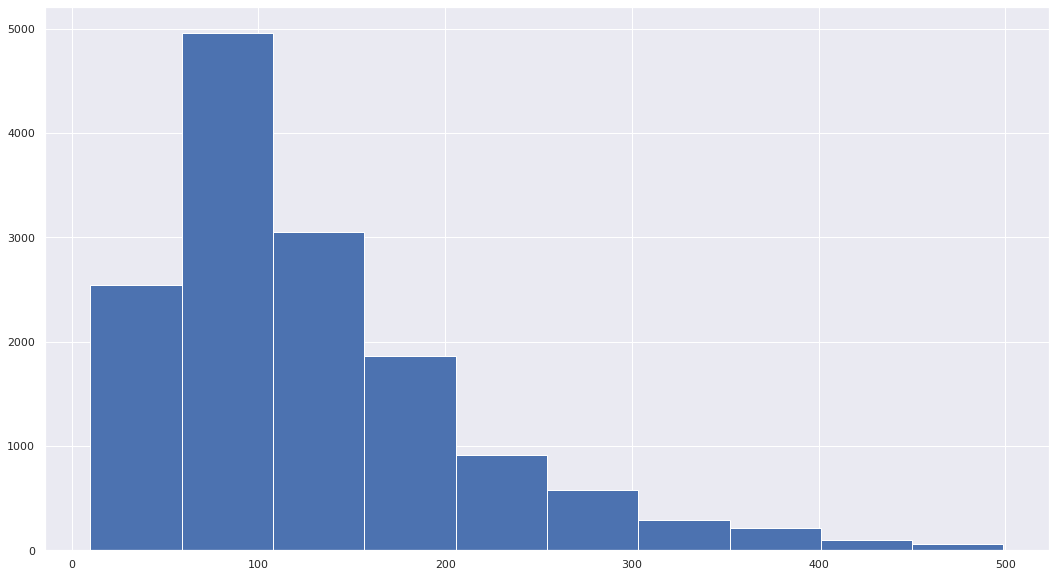

In [ ]:
plt.hist(sample_1.price)

In [ ]:
k2, p = stats.normaltest(sample_1.price)
print(f'P value ={p}')
if p < 0.05:
  print('H0 rejected, not normal distribution.')
else:
  print('H0 accepted, normal distribution.')

P value =0.0
H0 rejected, not normal distribution.


In [ ]:
log_price = pd.DataFrame(np.log(sample_1.price))

In [ ]:
k2, p = stats.normaltest(log_price)
print(f'P value ={p}')
if p < 0.05:
  print('H0 rejected, not normal distribution.')
else:
  print('H0 accepted, normal distribution.')

P value =[1.10980509e-46]
H0 rejected, not normal distribution.


In [ ]:
a = 140
statistic, p = stats.ttest_1samp(sample_1.price , popmean= a)
print(f'P value ={p}')
if p < 0.05:
  print(f'H0 rejected, mean of this sample is not equal to {a}.')
else:
  print(f'H0 accepted, mean of this sample is equal to {a}.')

P value =1.1770333187864096e-45
H0 rejected, mean of this sample is not equal to 140.


In [ ]:
sample_1.price.mean()

129.96159648882184

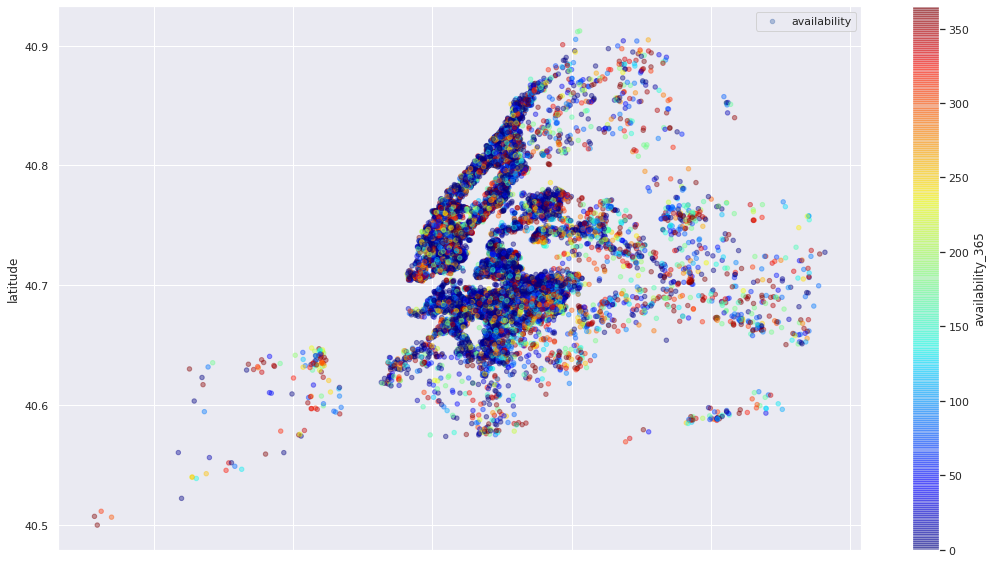

In [ ]:
ax=sample_1.plot(kind='scatter', x='longitude',y='latitude',label='availability',
                                 c='availability_365',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4, figsize=(18,10))
ax.legend()
plt.ioff()
plt.show()

In [ ]:
Brooklyn = sample_1.loc[sample_1['neighbourhood_group'] == 'Brooklyn']
Manhattan = sample_1.loc[sample_1['neighbourhood_group'] == 'Manhattan']
Queens = sample_1.loc[sample_1['neighbourhood_group'] == 'Queens']
Bronx = sample_1.loc[sample_1['neighbourhood_group'] == 'Bronx']
Staten_Island = sample_1.loc[sample_1['neighbourhood_group'] == 'Staten Island']

In [ ]:
availability_mean_data = {"neighbourhood":["Brooklyn", "Manhattan", "Queens", "Bronx", "Staten_Island"],
        "mean":[Brooklyn.availability_365.mean(), Manhattan.availability_365.mean(), Queens.availability_365.mean(),
                Bronx.availability_365.mean(), Staten_Island.availability_365.mean()] }
     

availability_mean = pd.DataFrame(data=availability_mean_data)

In [ ]:
availability_mean

,neighbourhood,mean
0,Brooklyn,98.452675
1,Manhattan,110.172019
2,Queens,142.000000
3,Bronx,161.982143
4,Staten_Island,212.212389


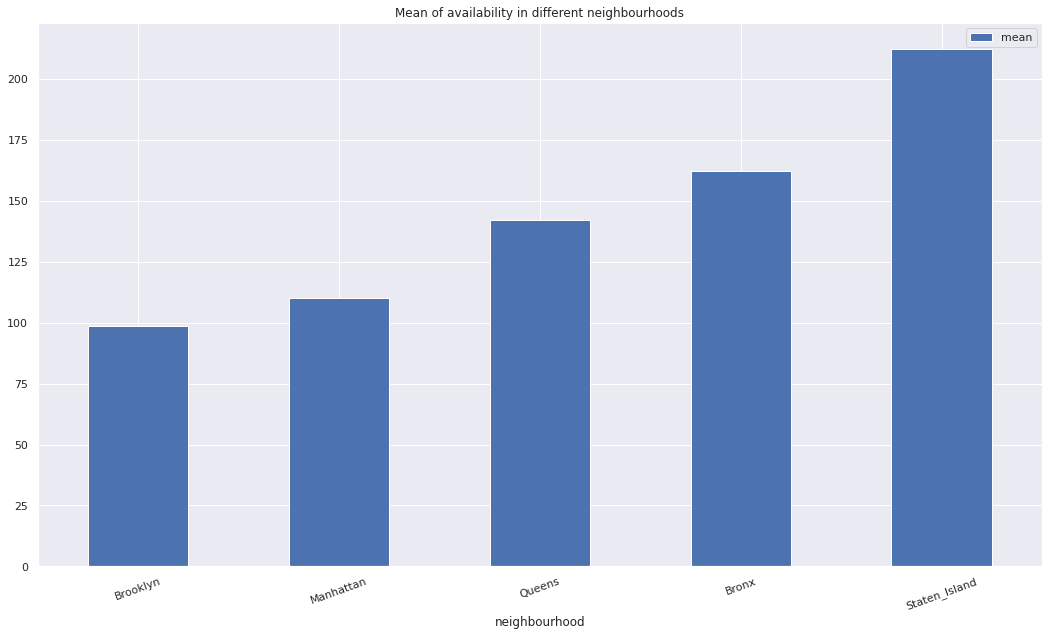

In [ ]:
availability_mean.plot.bar(x="neighbourhood", y="mean", rot=20, title="Mean of availability in different neighbourhoods")

In [ ]:
statistic, p = stats.ttest_ind(Brooklyn.availability_365, Manhattan.availability_365)
print(f'P value ={p}')
if p < 0.05:
  print(f'H0 rejected, samples do not have identical average.')
else:
  print(f'H0 accepted, samples have identical average.')

P value =3.984092229116773e-07
H0 rejected, samples do not have identical average.


In [ ]:
Brooklyn.price.mean()

111.56279835390947

In [ ]:
Manhattan.price.mean()

161.7516693163752

In [ ]:
Brooklyn_data = sample_1[sample_1['neighbourhood_group']== 'Manhattan']

In [ ]:
cor , p = stats.spearmanr(Brooklyn_data.minimum_nights, Brooklyn_data.price)
print(f'cor value ={cor}')
print(f'P value ={p}')
if p < 0.05:
  print(f'H0 rejected, There is a significant linear relationship.')
else:
  print(f'H0 accepted, There is not a significant linear relationship.')
print("cor: %.4f , pval: %.4f"%(cor,p))

cor value =0.10259526582847969
P value =3.4431749171331773e-16
H0 rejected, There is a significant linear relationship.
cor: 0.1026 , pval: 0.0000


In [ ]:
cor , p = stats.spearmanr(sample_1.latitude, sample_1.price)
print(f'cor value ={cor}')
print(f'P value ={p}')
if p < 0.05:
  print(f'H0 rejected, There is a significant linear relationship.')
else:
  print(f'H0 accepted, There is not a significant linear relationship.')
print("cor: %.4f , pval: %.4f"%(cor,p))

cor value =0.12772215388170416
P value =4.357219115189937e-54
H0 rejected, There is a significant linear relationship.
cor: 0.1277 , pval: 0.0000
